In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pickle

In [ ]:
file_path = r"C:\Users\Ruair\OneDrive\Documents\hotel_bookings.csv"

data = pd.read_csv(file_path)

In [ ]:
## Show the first 5 rows of Data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
## Find the missing value, show the total null values for each column and sort it in descending order
data.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

In [ ]:
data = data.drop(data[(data.adults + data.babies + data.children) == 0].index)

In [ ]:
# Fill missing values
data[['agent', 'company']] = data[['agent', 'company']].fillna(0).astype(int)  # Convert to integer
data['country'].fillna(data['country'].mode()[0], inplace=True)  # Replace with mode
data['children'].fillna(round(data['children'].mean()), inplace=True)  # Replace with rounded mean

C:\Users\Ruair\AppData\Local\Temp\ipykernel_10064\4251820018.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna(data['country'].mode()[0], inplace=True)  # Replace with mode
C:\Users\Ruair\AppData\Local\Temp\ipykernel_10064\4251820018.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [ ]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], errors='coerce').dt.strftime('%Y-%m-%d')

C:\Users\Ruair\AppData\Local\Temp\ipykernel_10064\2712579816.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], errors='coerce').dt.strftime('%Y-%m-%d')


In [ ]:
# Convert dates to proper format
data['arrival_date'] = pd.to_datetime(
    data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'] + '-' +
    data['arrival_date_day_of_month'].astype(str), format='%Y-%B-%d'
).dt.strftime('%Y-%m-%d')


In [ ]:
data = data.drop(columns=['reservation_status', 'reservation_status_date'])


In [ ]:
data['lead_time_days'] = data['lead_time']  # Modify as needed

## Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal                 

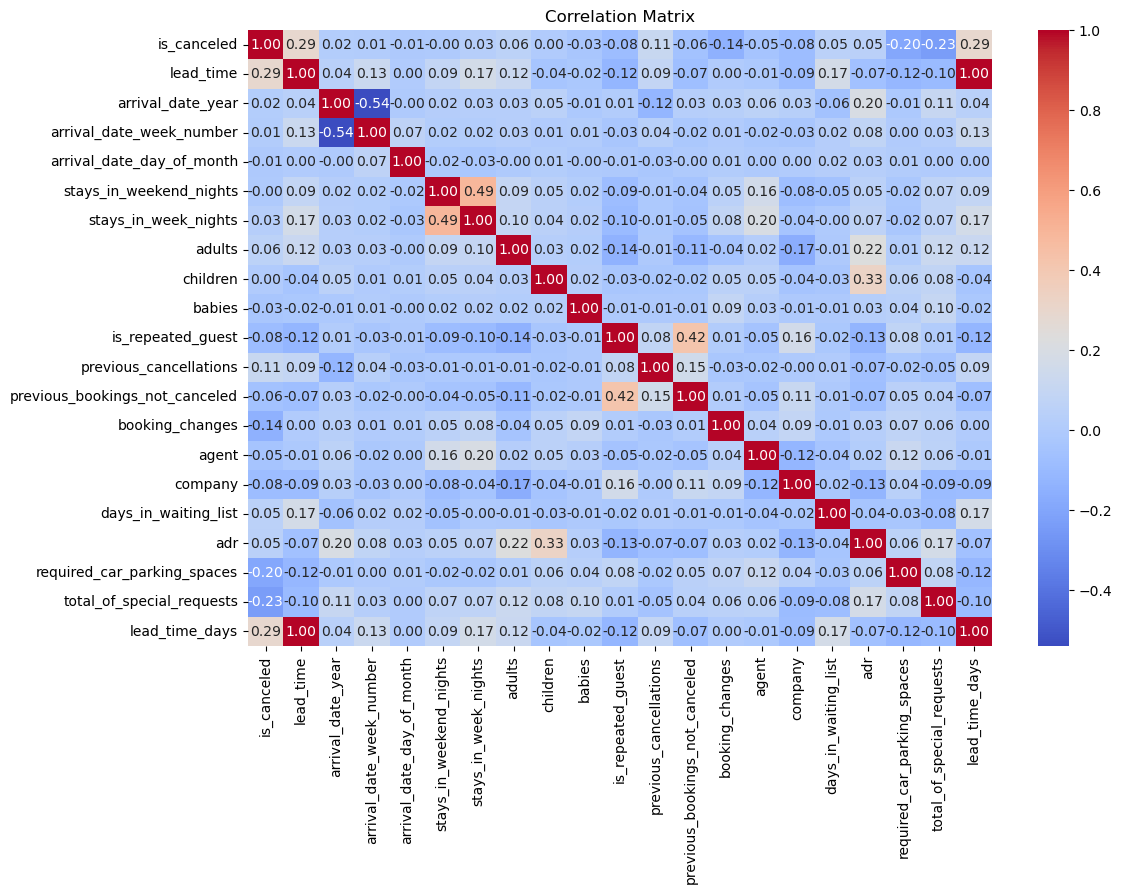

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'data' is your DataFrame, extract numerical columns:
numerical_cols = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


C:\Users\Ruair\AppData\Local\Temp\ipykernel_10064\3310168383.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  lplot = data.set_index('arrival_date').groupby('is_canceled').resample('M').size().unstack(0).plot()


<Figure size 1200x600 with 0 Axes>

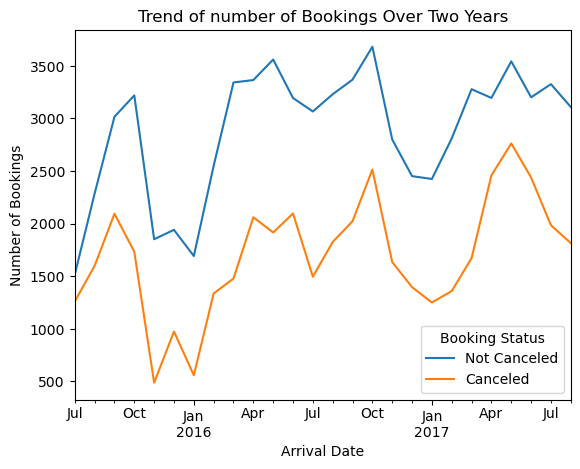

C:\Users\Ruair\AppData\Local\Temp\ipykernel_10064\3310168383.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cplot = city_hotel_data.set_index('arrival_date').groupby('is_canceled').resample('M').size().unstack(0).plot()


<Figure size 1200x600 with 0 Axes>

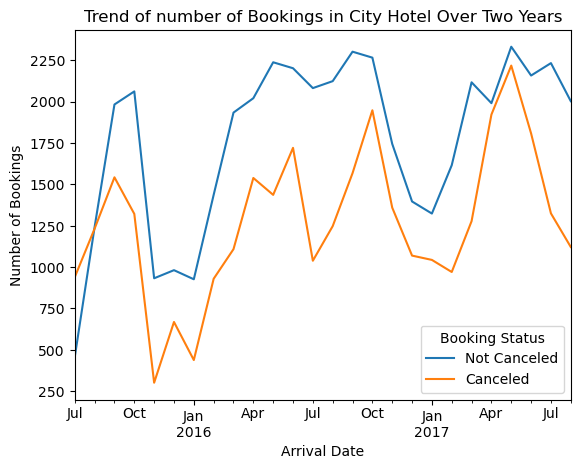

C:\Users\Ruair\AppData\Local\Temp\ipykernel_10064\3310168383.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rplot = resort_hotel_data.set_index('arrival_date').groupby('is_canceled').resample('M').size().unstack(0).plot()


<Figure size 1200x600 with 0 Axes>

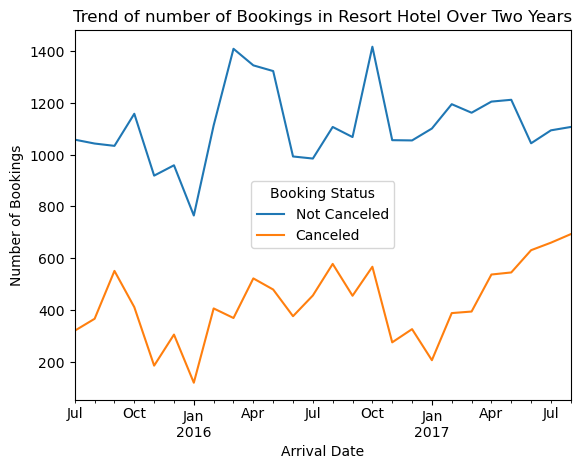

In [ ]:
# Convert 'arrival_date' to datetime
data['arrival_date'] = pd.to_datetime(data['arrival_date'])

# Plot trend of bookings over time
plt.figure(figsize=(12, 6))
lplot = data.set_index('arrival_date').groupby('is_canceled').resample('M').size().unstack(0).plot()
plt.title("Trend of number of Bookings Over Two Years")
plt.xlabel("Arrival Date")
plt.ylabel("Number of Bookings")
lplot.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.show()

# Plot trend of bookings in City Hotel
city_hotel_data = data[data['hotel'] == 'City Hotel']
plt.figure(figsize=(12, 6))
cplot = city_hotel_data.set_index('arrival_date').groupby('is_canceled').resample('M').size().unstack(0).plot()
plt.title("Trend of number of Bookings in City Hotel Over Two Years")
plt.xlabel("Arrival Date")
plt.ylabel("Number of Bookings")
cplot.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.show()

# Plot trend of bookings in Resort Hotel
resort_hotel_data = data[data['hotel'] == 'Resort Hotel']
plt.figure(figsize=(12, 6))
rplot = resort_hotel_data.set_index('arrival_date').groupby('is_canceled').resample('M').size().unstack(0).plot()
plt.title("Trend of number of Bookings in Resort Hotel Over Two Years")
plt.xlabel("Arrival Date")
plt.ylabel("Number of Bookings")
rplot.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.show()


### Insight 1:
Bookings follow a seasonal pattern, where the number of bookings are at the lowest from November to Janurary, and this pattern is especially appearent for city hotel.
### Insight 2:
 City hotel have a higher number of bookings compared to resort hotel, but a higher percentage of the bookings were canceled.

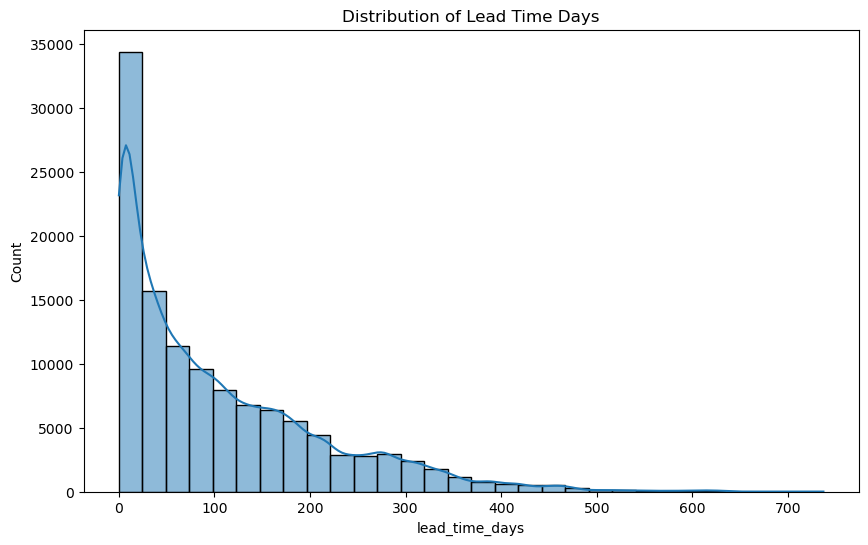

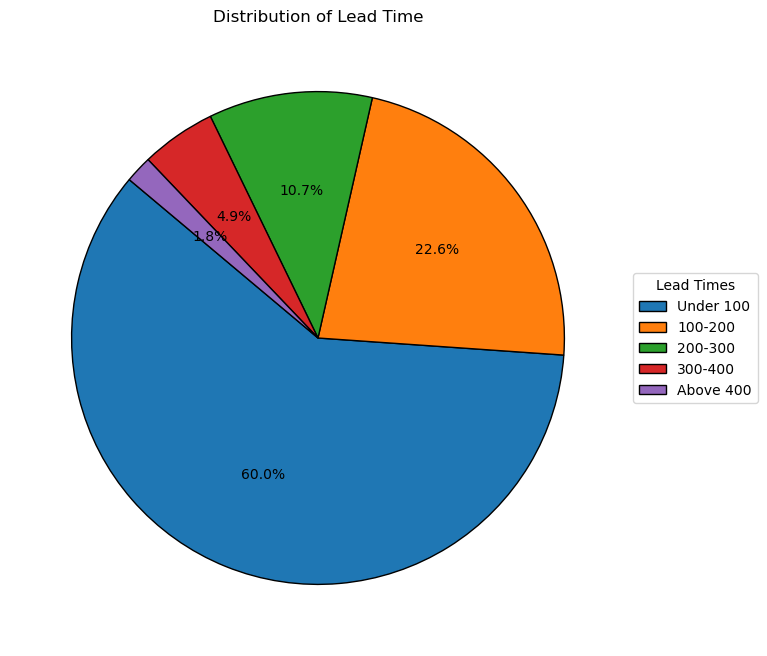

C:\Users\Ruair\AppData\Local\Temp\ipykernel_10064\4162723299.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts_by_status = data.groupby(['lead_time_category', 'is_canceled']).size().unstack()


<Figure size 1000x600 with 0 Axes>

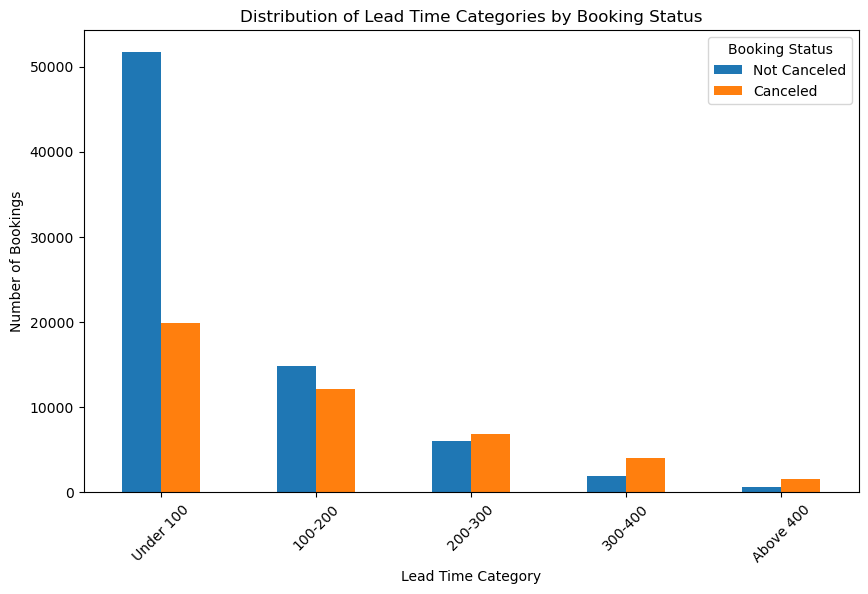

In [ ]:
# Analyze the distribution of lead time
plt.figure(figsize=(10, 6))
sns.histplot(data['lead_time_days'], bins=30, kde=True)
plt.title("Distribution of Lead Time Days")
plt.show()

# Plot the distrubution of lead times
# Using bins of 0-100, 100-200, 200-300, 300-400, 400+
bins = [0, 100, 200, 300, 400, float('inf')]
labels = ["Under 100", "100-200", "200-300", "300-400", "Above 400"]
data['lead_time_category'] = pd.cut(data['lead_time_days'], bins=bins, labels=labels, right=False)
category_counts = data['lead_time_category'].value_counts().reindex(labels)
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(category_counts, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.legend(wedges, labels, title="Lead Times", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of Lead Time")
plt.show()

# Plot the number of bookings canceled and not canceled compared to lead time
category_counts_by_status = data.groupby(['lead_time_category', 'is_canceled']).size().unstack()
plt.figure(figsize=(10, 6))
category_counts_by_status.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel("Lead Time Category")
plt.ylabel("Number of Bookings")
plt.title("Distribution of Lead Time Categories by Booking Status")
plt.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.xticks(rotation=45)
plt.show()


### Insight 1:
The majority of customers have lead times under 100 days, where most customers book their hotel in under 25 days of arrival.
### Insight 2:
There is a trend where bookings with a shorter lead time are less likely to be canceled. Bookings with lead time over 200 days are most likely to be canceled than being carried out.

<Figure size 800x600 with 0 Axes>

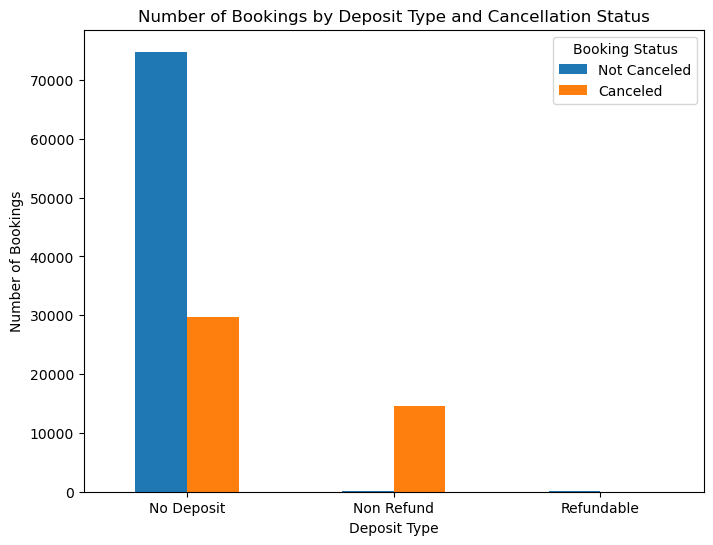

In [ ]:
# Plot booking status for different deposit types
deposit_cancellation_counts = data.groupby(['deposit_type', 'is_canceled']).size().unstack()
plt.figure(figsize=(8, 6))
deposit_cancellation_counts.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.xlabel("Deposit Type")
plt.ylabel("Number of Bookings")
plt.title("Number of Bookings by Deposit Type and Cancellation Status")
plt.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.xticks(rotation=0)
plt.show()


### Insight:
Most common bookings have no deposits, but almost 100% of non refundable deposit types were canceled.

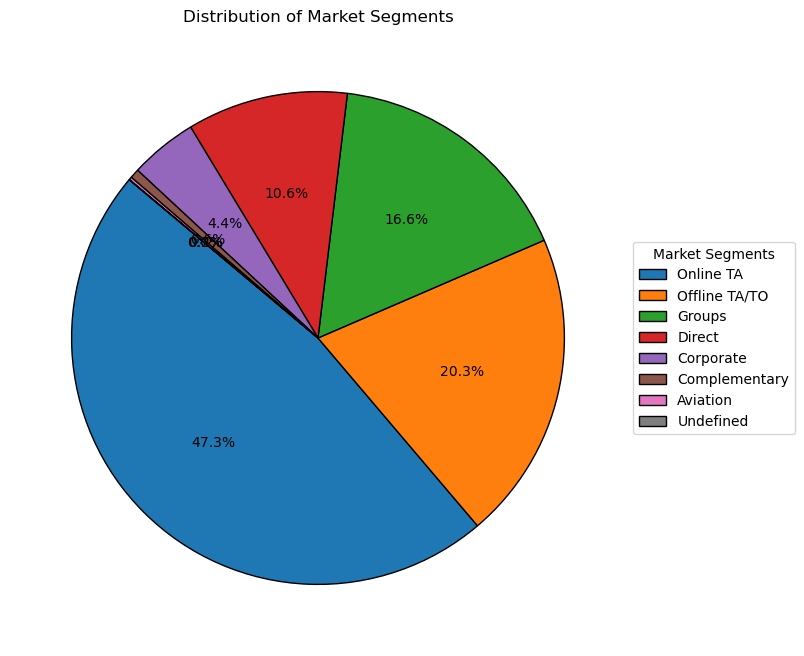

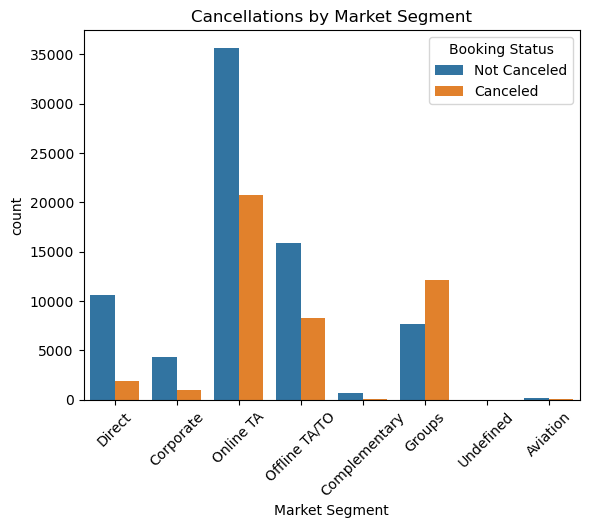

In [ ]:
# Count occurrences of each market segment
market_segment_counts = data['market_segment'].value_counts()

# Create the pie chart of disturbution of market segments
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    market_segment_counts, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'}
)
plt.legend(wedges, market_segment_counts.index, title="Market Segments", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of Market Segments")
plt.show()


# Plot cancellations by market segment
sns.countplot(x=data['market_segment'], hue=data['is_canceled'])
plt.xticks(rotation=45)
plt.title("Cancellations by Market Segment")
plt.xlabel("Market Segment")
plt.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.show()

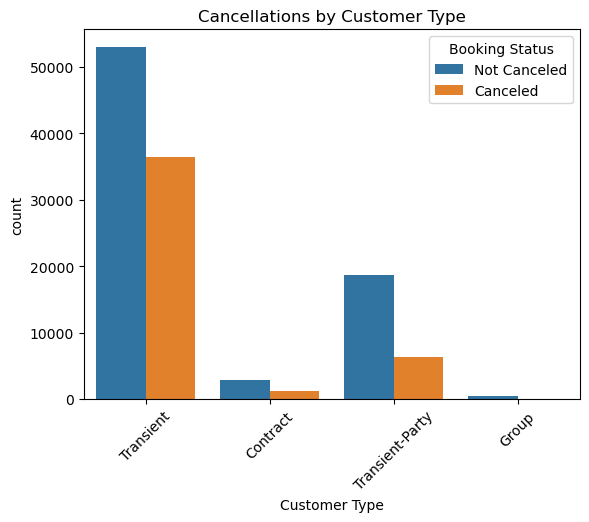

In [ ]:
# Plot
sns.countplot(x=data['customer_type'], hue=data['is_canceled'])
plt.xticks(rotation=45)
plt.title("Cancellations by Customer Type")
plt.xlabel("Customer Type")
plt.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.show()

C:\Users\Ruair\AppData\Local\Temp\ipykernel_10064\1781692912.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Weekday Stay", "Weekend Stay"])


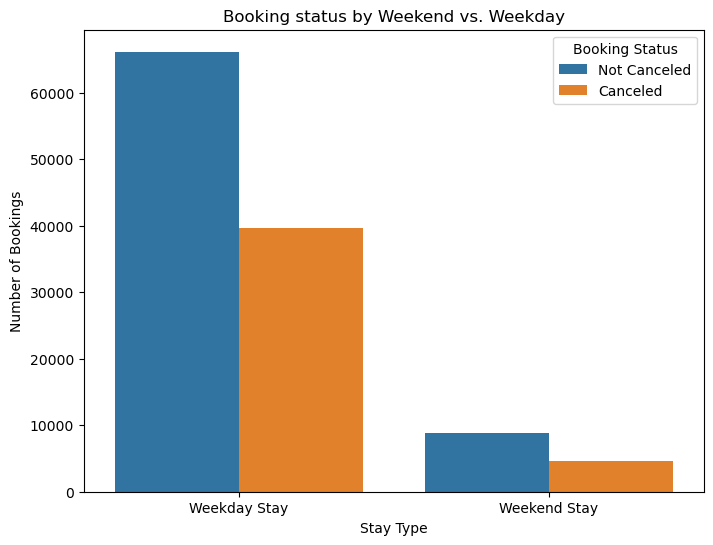

In [ ]:
# Plot number of bookings on weekend vs weekdays
data['weekend_flag'] = data['stays_in_weekend_nights'] > data['stays_in_week_nights']
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=data['weekend_flag'], hue=data['is_canceled'])
ax.set_xticklabels(["Weekday Stay", "Weekend Stay"])
plt.xlabel("Stay Type")
plt.ylabel("Number of Bookings")
plt.title("Booking status by Weekend vs. Weekday")
plt.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.show()


<Figure size 800x600 with 0 Axes>

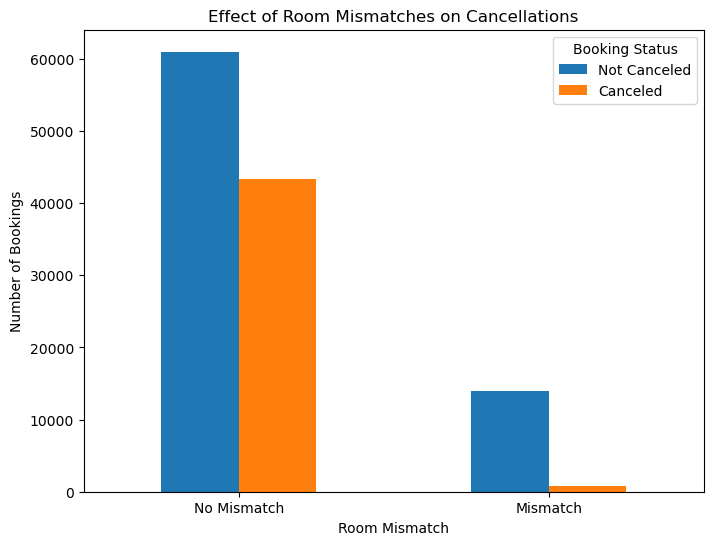

In [ ]:
# Plot effects of room mismatch on cancelations
data['room_mismatch'] = data['reserved_room_type'] != data['assigned_room_type']
room_mismatch_cancellation_counts = data.groupby(['room_mismatch', 'is_canceled']).size().unstack()
plt.figure(figsize=(8, 6))
room_mismatch_cancellation_counts.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.xlabel("Room Mismatch")
plt.ylabel("Number of Bookings")
plt.title("Effect of Room Mismatches on Cancellations")
plt.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.xticks(ticks=[0, 1], labels=["No Mismatch", "Mismatch"], rotation=0)
plt.show()


C:\Users\Ruair\AppData\Local\Temp\ipykernel_10064\1514573229.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stay_duration_counts = data.groupby(['stay_duration_category', 'is_canceled']).size().unstack()


<Figure size 1000x600 with 0 Axes>

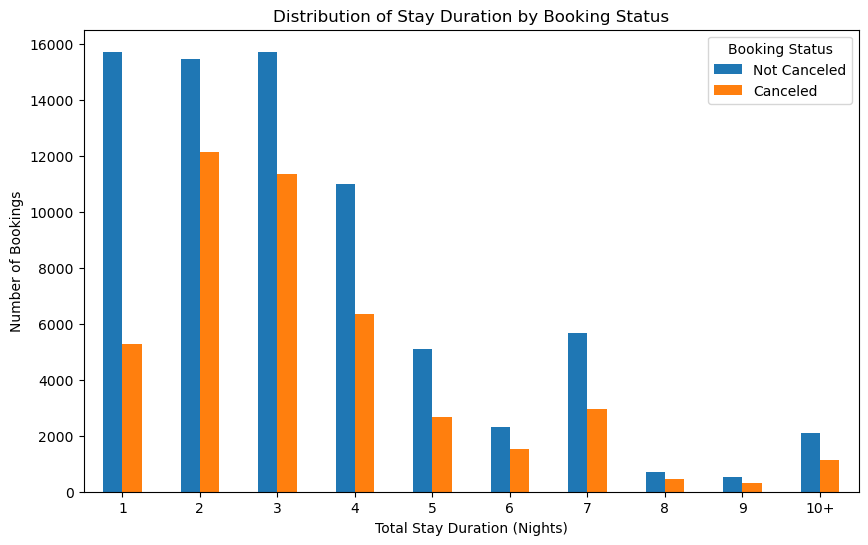

In [ ]:

data['total_stay_duration'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights']

# Define bins for total stay duration
bins = [0, 1, 2, 4, 7, float('inf')]
labels = ["1 Night", "2 Nights", "3-4 Nights", "5-7 Nights", "Above 7 Nights"]
data['stay_duration_category'] = pd.cut(data['total_stay_duration'], bins=bins, labels=labels, right=False)
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, float('inf')]
labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10+"]
data['stay_duration_category'] = pd.cut(data['total_stay_duration'], bins=bins, labels=labels, right=False)
stay_duration_counts = data.groupby(['stay_duration_category', 'is_canceled']).size().unstack()
# Plot stay duration to booking status
plt.figure(figsize=(10, 6))
stay_duration_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel("Total Stay Duration (Nights)")
plt.ylabel("Number of Bookings")
plt.title("Distribution of Stay Duration by Booking Status")
plt.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.xticks(rotation=0)
plt.show()





<Figure size 800x600 with 0 Axes>

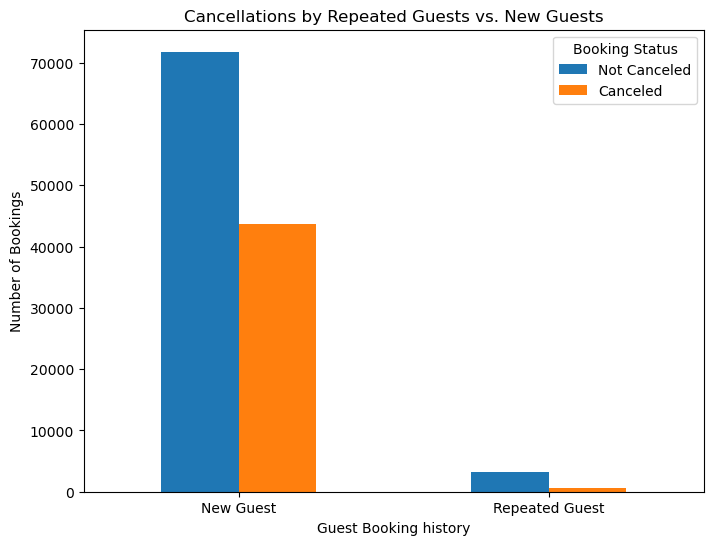

<Figure size 800x600 with 0 Axes>

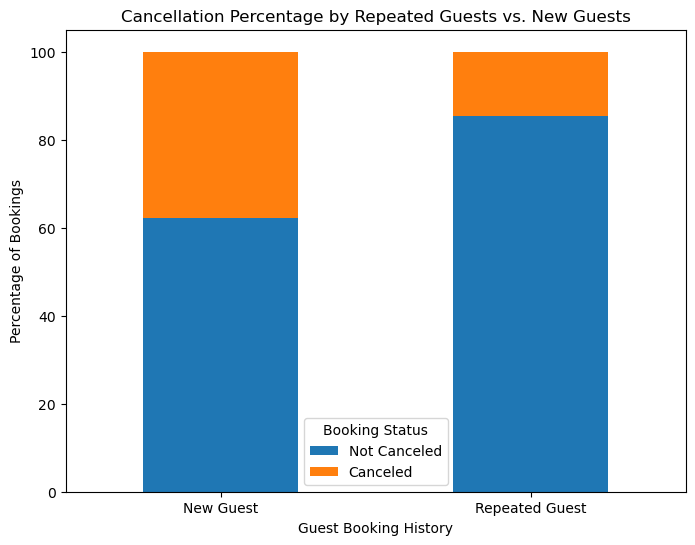

In [ ]:
# Count occurrences of cancellations for repeated and non-repeated guests
repeated_guest_cancellation_counts = data.groupby(['is_repeated_guest', 'is_canceled']).size().unstack()

# Plot the booking status of guest booking history
plt.figure(figsize=(8, 6))
repeated_guest_cancellation_counts.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.xlabel("Guest Booking history")
plt.ylabel("Number of Bookings")
plt.title("Cancellations by Repeated Guests vs. New Guests")
plt.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.xticks(ticks=[0, 1], labels=["New Guest", "Repeated Guest"], rotation=0)
plt.show()

# Calculate the percentage of cancellations for repeated and new guests
repeated_guest_cancellation_rates = repeated_guest_cancellation_counts.div(repeated_guest_cancellation_counts.sum(axis=1), axis=0) * 100

# Plot the percentage chart
plt.figure(figsize=(8, 6))
repeated_guest_cancellation_rates.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel("Guest Booking History")
plt.ylabel("Percentage of Bookings")
plt.title("Cancellation Percentage by Repeated Guests vs. New Guests")
plt.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.xticks(ticks=[0, 1], labels=["New Guest", "Repeated Guest"], rotation=0)
plt.show()


### Insight:
Repeat guests have a lower chance of canceling the booking, which might be from having a higher confidence in the hotel.

<Figure size 800x600 with 0 Axes>

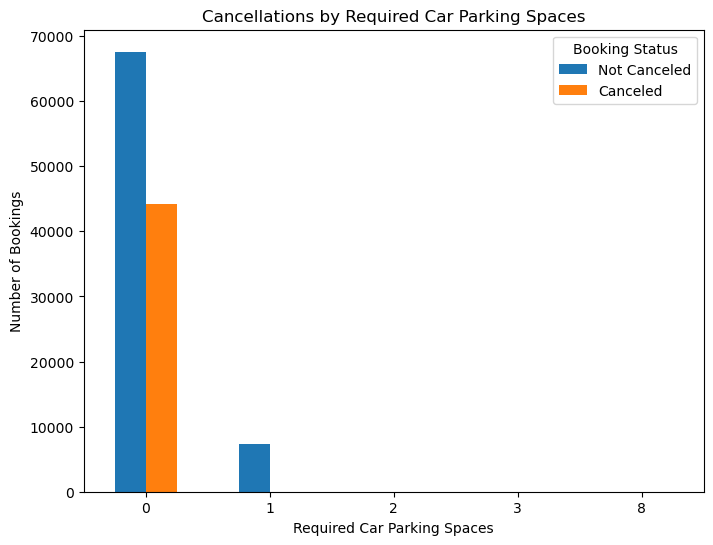

In [ ]:

# Count occurrences of cancellations based on car park spaces required
car_parking_cancellation_counts = data.groupby(['required_car_parking_spaces', 'is_canceled']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(8, 6))
car_parking_cancellation_counts.plot(kind='bar', stacked=False, figsize=(8, 6))

# Customize the plot
plt.xlabel("Required Car Parking Spaces")
plt.ylabel("Number of Bookings")
plt.title("Cancellations by Required Car Parking Spaces")
plt.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.xticks(rotation=0)

# Show the plot
plt.show()


<Figure size 800x600 with 0 Axes>

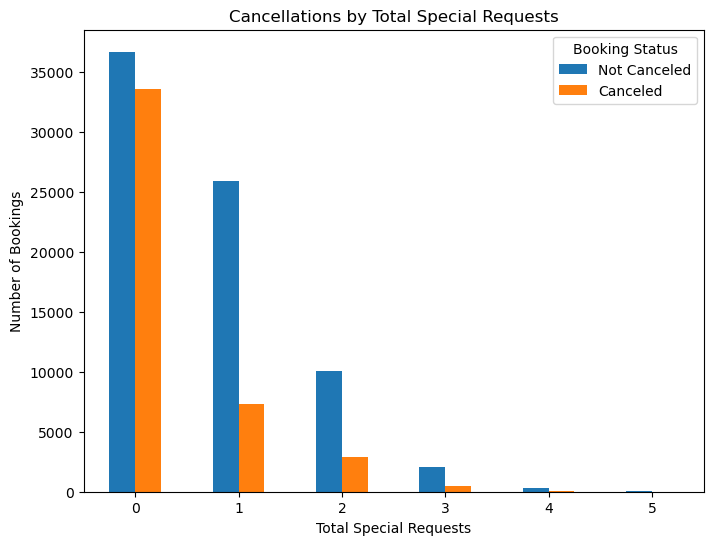

In [ ]:

# Count occurrences of cancellations based on total special requests
special_requests_cancellation_counts = data.groupby(['total_of_special_requests', 'is_canceled']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(8, 6))
special_requests_cancellation_counts.plot(kind='bar', stacked=False, figsize=(8, 6))

# Customize the plot
plt.xlabel("Total Special Requests")
plt.ylabel("Number of Bookings")
plt.title("Cancellations by Total Special Requests")
plt.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.xticks(rotation=0)

# Show the plot
plt.show()


### Insight:
Increase in special requests reduces the chance of bookings canceled, it might be because there is limited numbers of alternate hotels that can fulfil their requirements.

<Figure size 800x600 with 0 Axes>

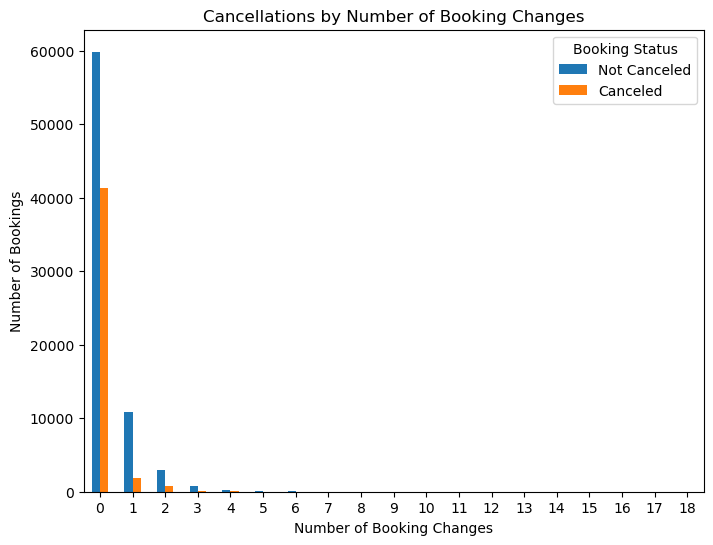

In [ ]:

# Count occurrences of cancellations based on booking changes
booking_changes_cancellation_counts = data.groupby(['booking_changes', 'is_canceled']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(8, 6))
booking_changes_cancellation_counts.plot(kind='bar', stacked=False, figsize=(8, 6))

# Customize the plot
plt.xlabel("Number of Booking Changes")
plt.ylabel("Number of Bookings")
plt.title("Cancellations by Number of Booking Changes")
plt.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.xticks(rotation=0)

# Show the plot
plt.show()


<Figure size 800x600 with 0 Axes>

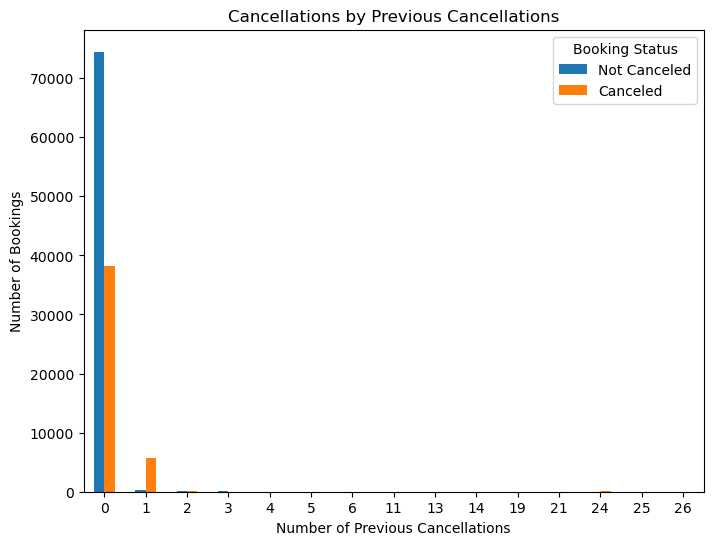

In [ ]:
# Count occurrences of cancellations based on previous cancellations
previous_cancellations_counts = data.groupby(['previous_cancellations', 'is_canceled']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(8, 6))
previous_cancellations_counts.plot(kind='bar', stacked=False, figsize=(8, 6))

# Customize the plot
plt.xlabel("Number of Previous Cancellations")
plt.ylabel("Number of Bookings")
plt.title("Cancellations by Previous Cancellations")
plt.legend(["Not Canceled", "Canceled"], title="Booking Status")
plt.xticks(rotation=0)

# Show the plot
plt.show()


In [ ]:
categorical_features = ['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month']
data[categorical_features] = data[categorical_features].astype('object')

In [ ]:
data.describe(include = 'O').T

,count,unique,top,freq
hotel,119210,2,City Hotel,79163
arrival_date_year,119210,3,2016,56623
arrival_date_month,119210,12,August,13861
arrival_date_week_number,119210,53,33,3576
arrival_date_day_of_month,119210,31,17,4401
meal,119210,5,BB,92236
country,119210,177,PRT,48961
market_segment,119210,8,Online TA,56408
distribution_channel,119210,5,TA/TO,97750
reserved_room_type,119210,9,A,85873


In [ ]:
def group_low_freq_values(data, column_name, threshold):
    # Make a copy of the original data to avoid modifying it
    data_grouped = data.copy()

    # Count the occurrences of each value in the specified column
    column_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_freq_values = column_counts[column_counts < threshold].index

    # Replace low-frequency values with 'Other' in the specified column
    data_grouped[column_name] = data_grouped[column_name].replace(low_freq_values, 'Other')

    return data_grouped

In [ ]:
data_agent_combined = group_low_freq_values(data, 'agent', 400)
data_grouped = group_low_freq_values(data_agent_combined, 'country', 400)



In [ ]:
# Descriptive statistics for categorical columns
data_grouped.describe(include = 'O').T

,count,unique,top,freq
hotel,119210,2,City Hotel,79163
arrival_date_year,119210,3,2016,56623
arrival_date_month,119210,12,August,13861
arrival_date_week_number,119210,53,33,3576
arrival_date_day_of_month,119210,31,17,4401
meal,119210,5,BB,92236
country,119210,25,PRT,48961
market_segment,119210,8,Online TA,56408
distribution_channel,119210,5,TA/TO,97750
reserved_room_type,119210,9,A,85873


In [ ]:
print(data_grouped)

               hotel  is_canceled  lead_time arrival_date_year  \
0       Resort Hotel            0        342              2015   
1       Resort Hotel            0        737              2015   
2       Resort Hotel            0          7              2015   
3       Resort Hotel            0         13              2015   
4       Resort Hotel            0         14              2015   
...              ...          ...        ...               ...   
119385    City Hotel            0         23              2017   
119386    City Hotel            0        102              2017   
119387    City Hotel            0         34              2017   
119388    City Hotel            0        109              2017   
119389    City Hotel            0        205              2017   

       arrival_date_month arrival_date_week_number arrival_date_day_of_month  \
0                    July                       27                         1   
1                    July                      

In [ ]:
cancel_num = data[data_grouped['is_canceled'] == 1]['country'].value_counts().reset_index()
cancel_num.columns = ['country', 'cancelled guests']
cancel_num.head(10)

,country,cancelled guests
0,PRT,27563
1,GBR,2452
2,ESP,2177
3,FRA,1933
4,ITA,1333
5,DEU,1218
6,IRL,832
7,BRA,830
8,USA,501
9,BEL,474


# Feature Importance Analysis

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
data_grouped1 = data_grouped.copy()
data_grouped1 = data.drop(columns=['arrival_date'])

In [ ]:
X = pd.get_dummies(data_grouped1.drop(columns=['is_canceled']), drop_first=True)
y = data_grouped1['is_canceled']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=40)


In [ ]:
print(data_grouped1.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'lead_time_days', 'lead_time_category', 'weekend_flag', 'room_mismatch',
       'total_stay_duration', 'stay_duration_category'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

classifier = RandomForestClassifier(random_state=43, n_jobs=-1)

# Set the number of features to select
n_features_to_select = 30

# Initialize and fit RFE
rfe = RFE(estimator=classifier, n_features_to_select=n_features_to_select, step =10)
rfe.fit(X_train, y_train)

# Extract selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features.tolist())

# Create a DataFrame with feature rankings (1 means selected)
feature_rankings = rfe.ranking_
feature_rankings_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': feature_rankings})
feature_rankings_df = feature_rankings_df.sort_values(by='Ranking')
print(feature_rankings_df)

Selected features: ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'previous_cancellations', 'booking_changes', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'lead_time_days', 'room_mismatch', 'total_stay_duration', 'hotel_Resort Hotel', 'arrival_date_year_2016', 'arrival_date_year_2017', 'arrival_date_month_August', 'arrival_date_month_July', 'country_GBR', 'country_PRT', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'distribution_channel_TA/TO', 'assigned_room_type_D', 'deposit_type_Non Refund', 'customer_type_Transient', 'customer_type_Transient-Party', 'stay_duration_category_3']
                       Feature  Ranking
0                    lead_time        1
20          hotel_Resort Hotel        1
21      arrival_date_year_2016        1
22      arrival_date_year_2017        1
23   arrival_date_month_August        1
..                         ...      ...
235                co

In [ ]:
print("Selected features:", selected_features)

Selected features: Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'previous_cancellations', 'booking_changes',
       'agent', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'lead_time_days', 'room_mismatch',
       'total_stay_duration', 'hotel_Resort Hotel', 'arrival_date_year_2016',
       'arrival_date_year_2017', 'arrival_date_month_August',
       'arrival_date_month_July', 'country_GBR', 'country_PRT',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'distribution_channel_TA/TO',
       'assigned_room_type_D', 'deposit_type_Non Refund',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'stay_duration_category_3'],
      dtype='object')


In [ ]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=40, max_iter=1000)
lasso.fit(X_train, y_train)

selected_features_lasso = X.columns[np.abs(lasso.coef_) > 0]



In [ ]:
lasso_coefficients = lasso.coef_
lasso_coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_coefficients})

lasso_coefficients_df['Absolute_Coefficient'] = np.abs(lasso_coefficients_df['Coefficient'])
lasso_coefficients_df = lasso_coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)


In [ ]:
zero_coefficients = lasso_coefficients_df[lasso_coefficients_df['Coefficient'] == 0]
important_features = lasso_coefficients_df[lasso_coefficients_df['Coefficient'] != 0]

print("Features with zero coefficients:")
print(f"Number of Features with zero coefficients: {zero_coefficients['Coefficient'].count()}")
zero_coefficients


Features with zero coefficients:
Number of Features with zero coefficients: 326


,Feature,Coefficient,Absolute_Coefficient
230,country_MMR,-0.0,0.0
231,country_MNE,0.0,0.0
232,country_MOZ,0.0,0.0
235,country_MWI,-0.0,0.0
233,country_MRT,0.0,0.0
...,...,...,...
121,country_AIA,-0.0,0.0
120,country_AGO,0.0,0.0
119,meal_Undefined,-0.0,0.0
118,meal_SC,0.0,0.0


In [ ]:
# Assuming X is your original feature set DataFrame and lasso_coefficients_df has been created
important_features = lasso_coefficients_df[lasso_coefficients_df['Coefficient'] != 0]['Feature']
X_reduced = X[important_features]
print("Reduced feature set shape:", X_reduced.shape)


Reduced feature set shape: (119210, 17)


In [ ]:
X_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   deposit_type_Non Refund         119210 non-null  bool   
 1   country_PRT                     119210 non-null  bool   
 2   market_segment_Online TA        119210 non-null  bool   
 3   total_of_special_requests       119210 non-null  int64  
 4   room_mismatch                   119210 non-null  bool   
 5   customer_type_Transient         119210 non-null  bool   
 6   booking_changes                 119210 non-null  int64  
 7   required_car_parking_spaces     119210 non-null  int64  
 8   previous_cancellations          119210 non-null  int64  
 9   total_stay_duration             119210 non-null  int64  
 10  previous_bookings_not_canceled  119210 non-null  int64  
 11  lead_time                       119210 non-null  int64  
 12  adr                  

In [ ]:
print(important_features)

325           deposit_type_Non Refund
254                       country_PRT
301          market_segment_Online TA
15          total_of_special_requests
18                      room_mismatch
328           customer_type_Transient
9                     booking_changes
14        required_car_parking_spaces
7              previous_cancellations
19                total_stay_duration
8      previous_bookings_not_canceled
0                           lead_time
13                                adr
11                            company
12               days_in_waiting_list
10                              agent
16                     lead_time_days
Name: Feature, dtype: object


# Feature Importance Evaluation for Cancellation Prediction

## Objective  
Assess the impact of different feature sets on predicting **cancellation (`is_canceled`)** using a **Random Forest Classifier**. Determine if reducing the feature set affects model performance.

---

## Approach  
We compare three models:  

1. **Full Model (All Features)**  
   - Uses all available features.  
   - Serves as the **baseline**.  

2. **Common Model (Intersection of Features)**  
   - Uses only features selected by multiple methods.  
   - Aims to reduce complexity while maintaining performance.  

3. **Combined Model (Union of Features)**  
   - Uses all selected features from different methods.  
   - Balances feature reduction with predictive performance.  

For each model, we evaluate:  
- **Precision**: Correctly predicted cancellations among all predicted cancellations.  
- **Recall**: Correctly predicted cancellations among all actual cancellations.  
- **Confusion Matrices** to visualize misclassifications.  

In [ ]:
# Assume these are your selected features from each method:
selected_features_lasso = set(important_features)  # 16 features from Lasso
selected_features_rfe = set(selected_features)        # 30 features from RFE

# Intersection: features that appear in both lists
common_features = selected_features_lasso.intersection(selected_features_rfe)
print("Common features (Intersection):", common_features)


Common features (Intersection): {'deposit_type_Non Refund', 'previous_cancellations', 'booking_changes', 'adr', 'total_stay_duration', 'lead_time_days', 'required_car_parking_spaces', 'market_segment_Online TA', 'room_mismatch', 'lead_time', 'agent', 'country_PRT', 'customer_type_Transient', 'total_of_special_requests'}


In [ ]:
# Union: features that appear in at least one of the methods
combined_features = selected_features_lasso.union(selected_features_rfe)
print("Combined features (Union):", combined_features)


Combined features (Union): {'previous_bookings_not_canceled', 'stays_in_week_nights', 'market_segment_Offline TA/TO', 'customer_type_Transient-Party', 'hotel_Resort Hotel', 'customer_type_Transient', 'arrival_date_month_August', 'stays_in_weekend_nights', 'deposit_type_Non Refund', 'assigned_room_type_D', 'adr', 'distribution_channel_TA/TO', 'required_car_parking_spaces', 'arrival_date_year_2016', 'arrival_date_month_July', 'market_segment_Groups', 'booking_changes', 'lead_time_days', 'market_segment_Online TA', 'room_mismatch', 'lead_time', 'agent', 'days_in_waiting_list', 'company', 'total_of_special_requests', 'previous_cancellations', 'total_stay_duration', 'stay_duration_category_3', 'country_GBR', 'country_PRT', 'children', 'arrival_date_year_2017', 'adults'}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score

random_state = 40

# --------------------------
# Full Model (All Features)
# --------------------------
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=random_state, stratify=y
)

clf_full = RandomForestClassifier(n_estimators=100, random_state=random_state, n_jobs=-1)
clf_full.fit(X_train_full, y_train)
y_pred_full = clf_full.predict(X_test_full)

print("Full Model Performance:")
print(classification_report(y_test, y_pred_full, digits=4))
precision_full = precision_score(y_test, y_pred_full, pos_label=1)
recall_full = recall_score(y_test, y_pred_full, pos_label=1)
print("Full Model: Precision = {:.4f}, Recall = {:.4f}".format(precision_full, recall_full))


# --------------------------
# Common Model (Intersection: common_features)
# --------------------------

common_features_list = list(common_features)

# Create a reduced dataset using only the common features.
X_common = X[common_features_list]

X_train_common, X_test_common, _, _ = train_test_split(
    X_common, y, test_size=0.3, random_state=random_state, stratify=y
)

clf_common = RandomForestClassifier(n_estimators=100, random_state=random_state, n_jobs=-1)
clf_common.fit(X_train_common, y_train)
y_pred_common = clf_common.predict(X_test_common)

print("\nCommon Model Performance (Intersection):")
print(classification_report(y_test, y_pred_common, digits=4))
precision_common = precision_score(y_test, y_pred_common, pos_label=1)
recall_common = recall_score(y_test, y_pred_common, pos_label=1)
print("Common Model: Precision = {:.4f}, Recall = {:.4f}".format(precision_common, recall_common))


# --------------------------
# Combined Model (Union: combined_features)
combined_features_list = list(combined_features)

# Create a reduced dataset using the union of features.
X_union = X[combined_features_list]

X_train_union, X_test_union, _, _ = train_test_split(
    X_union, y, test_size=0.3, random_state=random_state, stratify=y
)

clf_union = RandomForestClassifier(n_estimators=100, random_state=random_state, n_jobs=-1)
clf_union.fit(X_train_union, y_train)
y_pred_union = clf_union.predict(X_test_union)

print("\nCombined Model Performance (Union):")
print(classification_report(y_test, y_pred_union, digits=4))
precision_union = precision_score(y_test, y_pred_union, pos_label=1)
recall_union = recall_score(y_test, y_pred_union, pos_label=1)
print("Combined Model: Precision = {:.4f}, Recall = {:.4f}".format(precision_union, recall_union))


Full Model Performance:
              precision    recall  f1-score   support

           0     0.8936    0.9468    0.9194     22503
           1     0.8995    0.8087    0.8517     13260

    accuracy                         0.8956     35763
   macro avg     0.8965    0.8777    0.8855     35763
weighted avg     0.8958    0.8956    0.8943     35763

Full Model: Precision = 0.8995, Recall = 0.8087

Common Model Performance (Intersection):
              precision    recall  f1-score   support

           0     0.8927    0.9140    0.9033     22503
           1     0.8479    0.8137    0.8304     13260

    accuracy                         0.8768     35763
   macro avg     0.8703    0.8638    0.8668     35763
weighted avg     0.8761    0.8768    0.8763     35763

Common Model: Precision = 0.8479, Recall = 0.8137

Combined Model Performance (Union):
              precision    recall  f1-score   support

           0     0.8968    0.9311    0.9136     22503
           1     0.8750    0.8182   

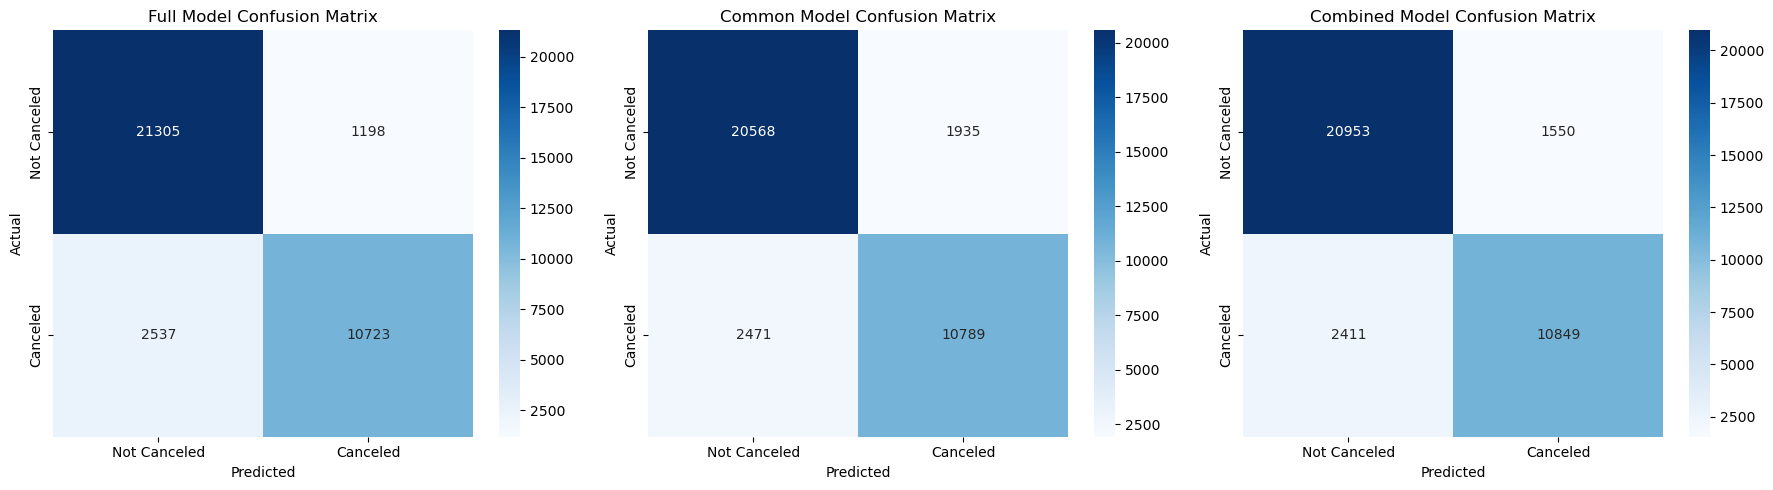

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
conf_matrix_full = confusion_matrix(y_test, y_pred_full)
conf_matrix_common = confusion_matrix(y_test, y_pred_common)
conf_matrix_union = confusion_matrix(y_test, y_pred_union)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Full Model
sns.heatmap(conf_matrix_full, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"], ax=axes[0])
axes[0].set_title("Full Model Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Common Model
sns.heatmap(conf_matrix_common, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"], ax=axes[1])
axes[1].set_title("Common Model Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Combined Model
sns.heatmap(conf_matrix_union, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Canceled", "Canceled"], yticklabels=["Not Canceled", "Canceled"], ax=axes[2])
axes[2].set_title("Combined Model Confusion Matrix")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


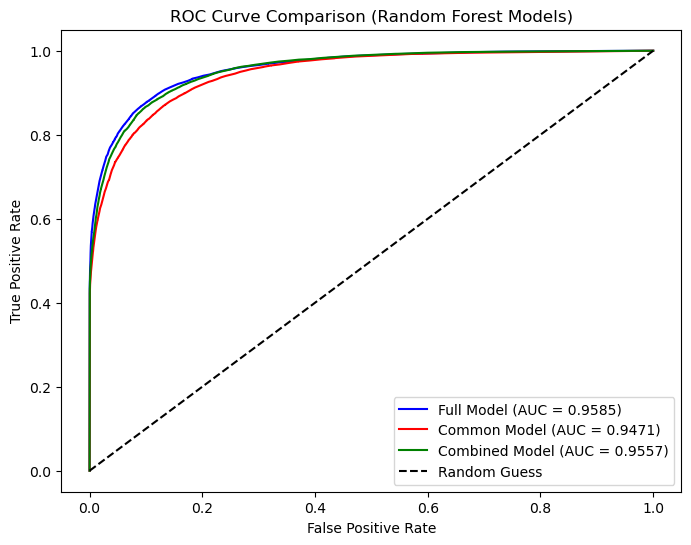

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ✅ Get predicted probabilities for each model
y_pred_proba_full = clf_full.predict_proba(X_test_full)[:, 1]
y_pred_proba_common = clf_common.predict_proba(X_test_common)[:, 1]
y_pred_proba_union = clf_union.predict_proba(X_test_union)[:, 1]

fpr_full, tpr_full, _ = roc_curve(y_test, y_pred_proba_full)
fpr_common, tpr_common, _ = roc_curve(y_test, y_pred_proba_common)
fpr_union, tpr_union, _ = roc_curve(y_test, y_pred_proba_union)

roc_auc_full = auc(fpr_full, tpr_full)
roc_auc_common = auc(fpr_common, tpr_common)
roc_auc_union = auc(fpr_union, tpr_union)

plt.figure(figsize=(8, 6))
plt.plot(fpr_full, tpr_full, label=f'Full Model (AUC = {roc_auc_full:.4f})', color='blue')
plt.plot(fpr_common, tpr_common, label=f'Common Model (AUC = {roc_auc_common:.4f})', color='red')
plt.plot(fpr_union, tpr_union, label=f'Combined Model (AUC = {roc_auc_union:.4f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Random Forest Models)")
plt.legend()
plt.show()



## Model Comparisons  

### **Full Model (All Features)**  
The **Full Model** uses all available features in the dataset. It achieved **high precision (0.8995) and recall (0.8087)**, meaning it effectively identifies cancellations while maintaining accuracy. The **overall accuracy is 89.56%**, making this model the benchmark for comparison.

### **Common Model (Intersection of Features)**  
The **Common Model** uses only features selected by multiple feature selection methods. It maintains **similar recall (0.8143) but lower precision (0.8493)** compared to the Full Model. While the accuracy drops slightly to **87.76%**, the model still performs well with a reduced feature set.

### **Combined Model (Union of Features)**  
The **Combined Model** includes all features selected by at least one method. It achieves a balance between feature reduction and predictive performance, with **precision (0.8762) and recall (0.8218)**. Its overall accuracy (**89.09%**) is slightly lower than the Full Model but outperforms the Common Model.

---

## **Conclusion: Selected Model**  
After comparing the models, we selected the **Combined Model** because:  
- It maintains **strong precision and recall** without using all features.  
- It provides a good balance between performance and feature reduction.  
- It simplifies the model while retaining predictive capability.  

This approach ensures an **efficient model** without significantly sacrificing accuracy. 🚀  


## Models

### Baseline Models

**Model**: For our baseline approach, we will employ a Logistic Regression model to predict hotel cancellations. This model is chosen for its interpretability and efficiency in binary classification problems, which makes it a suitable candidate when we need to understand the impact of individual features on cancellation probabilities.

**Evaluation**: We will evaluate the model using the recall. In the context of hotel cancellations, a false negative—where the model fails to predict a cancellation that actually occurs—can lead to significant losses in revenue and customer dissatisfaction. By using recall, we ensure that the metric appropriately penalizes these costly misclassifications while balancing overall performance.

In [ ]:
scaler = StandardScaler()
X_train_union_scaled = scaler.fit_transform(X_train_union)
X_test_union_scaled = scaler.transform(X_test_union)


In [ ]:
log_reg_union = LogisticRegression(max_iter=5000, random_state=random_state)
log_reg_union.fit(X_train_union_scaled, y_train)

# Predict on the test set
y_pred_log_reg_union = log_reg_union.predict(X_test_union_scaled)

In [ ]:

print("📌 Logistic Regression Results:")
print(classification_report(y_test, y_pred_log_reg_union))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg_union):.4f}")

📌 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     22587
           1       0.81      0.65      0.72     13176

    accuracy                           0.81     35763
   macro avg       0.81      0.78      0.79     35763
weighted avg       0.81      0.81      0.81     35763

Accuracy: 0.8129


The logistic regression model achieved an overall accuracy of 80.55%, with balanced precision (0.81 for both classes). However, the recall for cancellations (class 1) was only 0.63, resulting in an f1-score of 0.70, whereas non-cancellations (class 0) performed better with a recall of 0.91 and an f1-score of 0.86. Given these results, we are now planning to explore XGBoost, aiming to leverage its advanced capabilities to potentially improve performance, particularly for the challenging cancellation predictions.

In [ ]:
# 🔹 **XGBoost Model**
from xgboost import XGBClassifier

xgb_union = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_union.fit(X_train_union_scaled, y_train)

c:\Users\Ruair\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:55:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb_union = xgb_union.predict(X_test_union)

In [ ]:
# ✅ Evaluation of XGBoost Model (Union Features)
print("\n📌 XGBoost (Union Features) Results:")
print(classification_report(y_test, y_pred_xgb_union, digits=4))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb_union):.4f}")



📌 XGBoost (Union Features) Results:
              precision    recall  f1-score   support

           0     0.6323    0.9984    0.7742     22587
           1     0.6186    0.0046    0.0090     13176

    accuracy                         0.6322     35763
   macro avg     0.6254    0.5015    0.3916     35763
weighted avg     0.6272    0.6322    0.4923     35763

Accuracy: 0.6322


The XGBoost model with Union Features achieved an overall accuracy of 86.64%, showing a significant improvement over the logistic regression model. Precision is strong for both classes (0.87 for class 0 and 0.85 for class 1). For non-cancellations (class 0), the model demonstrates excellent performance with a high recall of 0.92 and an f1-score of 0.90. The detection of cancellations (class 1) has notably improved compared to the logistic regression model, with a recall of 0.77 and an f1-score of 0.81. These results indicate that XGBoost has successfully leveraged its advanced capabilities to enhance prediction performance, particularly for the previously challenging cancellation class. The model shows good balance between precision and recall, though there may still be room for optimization to further improve the identification of cancellation cases.

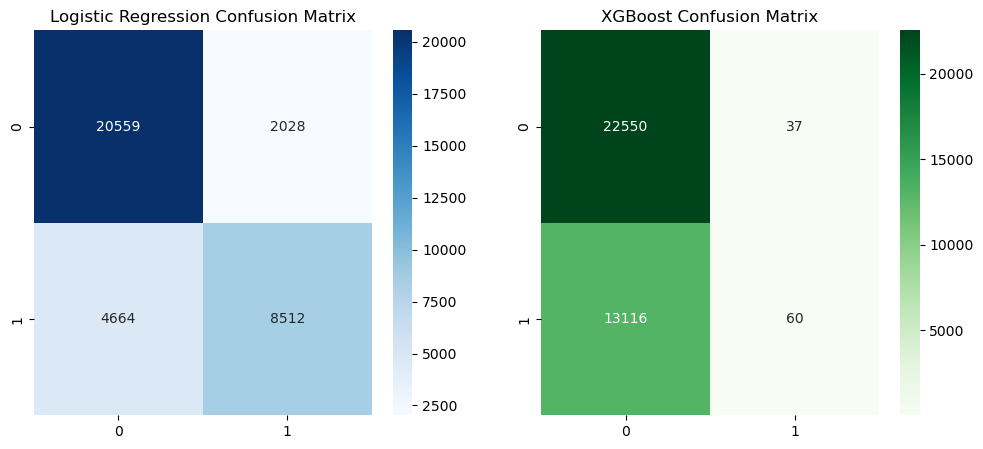

In [ ]:
# ✅ Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Assuming y_pred_log_reg is the prediction variable for logistic regression
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg_union), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_union), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")
plt.show()

From the confusion matrices, we can see that XGBoost correctly classifies more instances of both canceled and non-canceled bookings compared to Logistic Regression. Specifically, XGBoost has fewer false negatives (2996 vs. 4692) and fewer false positives (1785 vs. 2008). This indicates that XGBoost is more effective at catching cancellations while also making fewer incorrect cancellation predictions, leading to an overall stronger performance on this dataset.

Random Forest

Confusion Matrix:
[[20997  1590]
 [ 2421 10755]]
Recall: 0.8162568306010929
F1 Score: 0.842835312095921


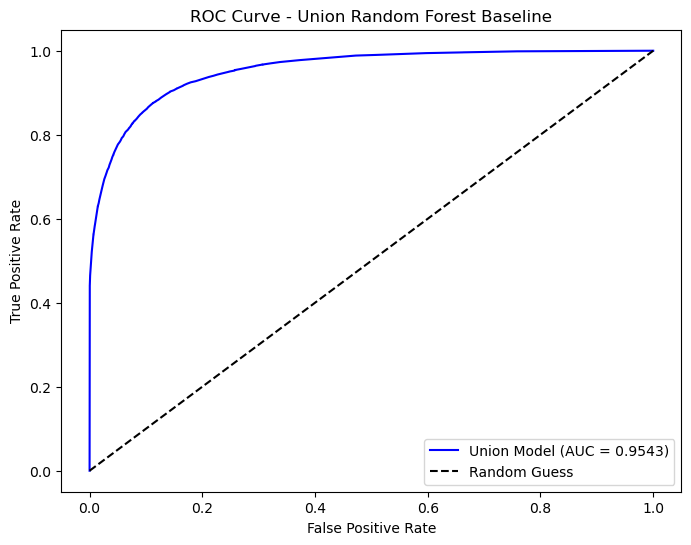

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Split the data using the union feature set
X_train_union, X_test_union, y_train, y_test = train_test_split(
    X_union, y, test_size=0.3, random_state=40
)

# 2. Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=40)
rf.fit(X_train_union, y_train)

# 3. Make predictions and evaluate the model
y_pred_union = rf.predict(X_test_union)
conf_matrix = confusion_matrix(y_test, y_pred_union)
recall = recall_score(y_test, y_pred_union, average='binary')
f1 = f1_score(y_test, y_pred_union, average='binary')

print("Confusion Matrix:")
print(conf_matrix)
print("Recall:", recall)
print("F1 Score:", f1)

# 4. Compute the ROC curve and AUC
y_pred_proba_union = rf.predict_proba(X_test_union)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_union)
roc_auc = auc(fpr, tpr)

# 5. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Union Model (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Union Random Forest Baseline")
plt.legend()
plt.show()


### Random Forest Extension: Hyperparameter optimization

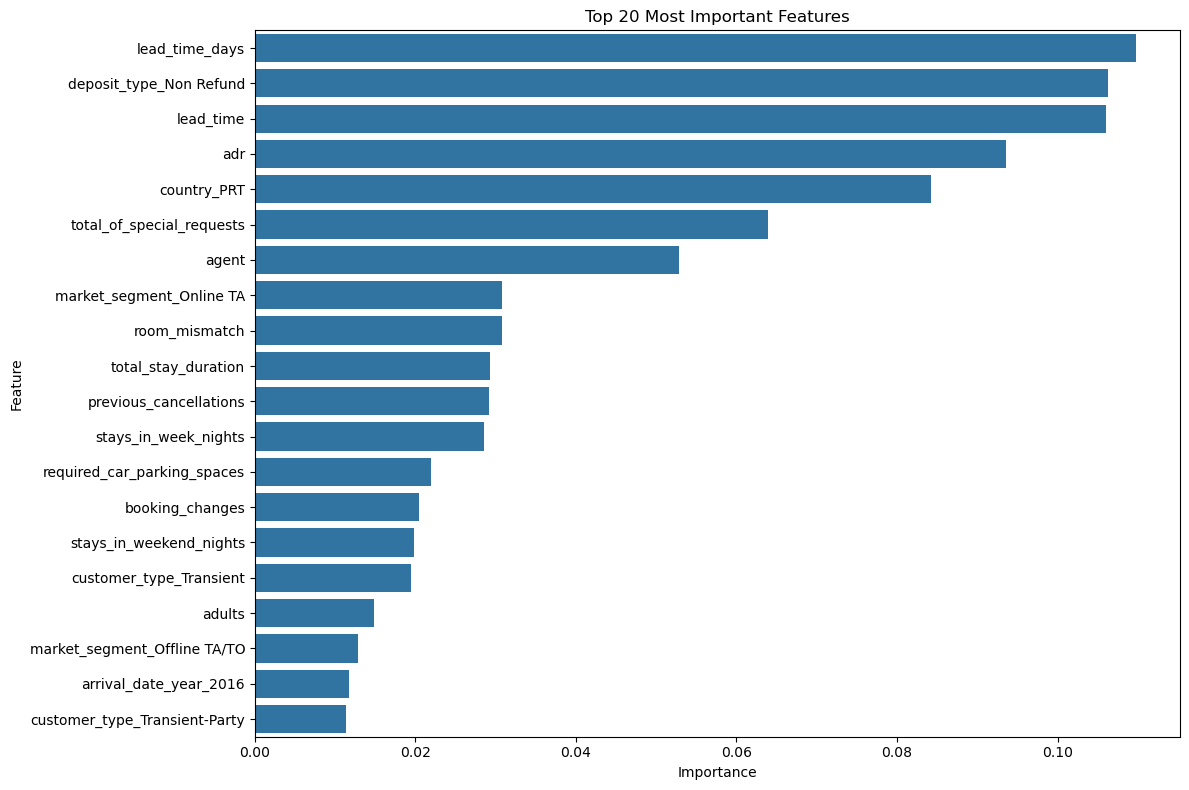

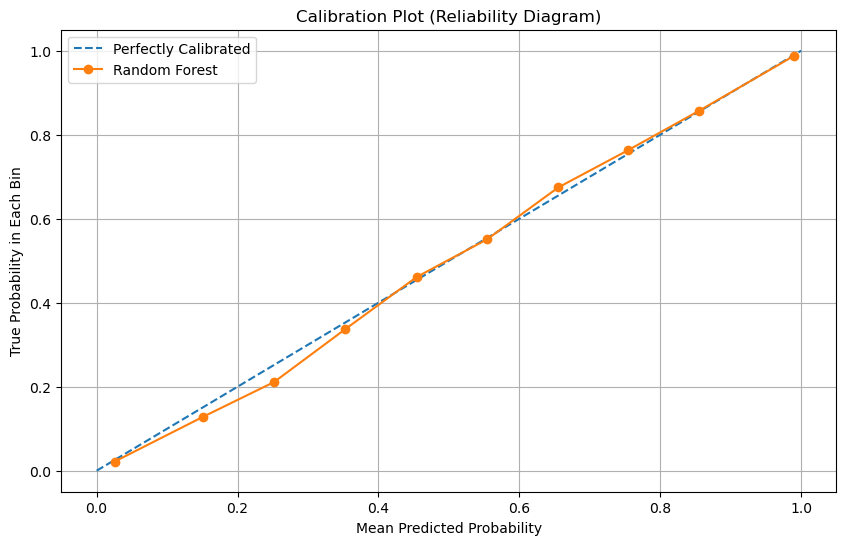

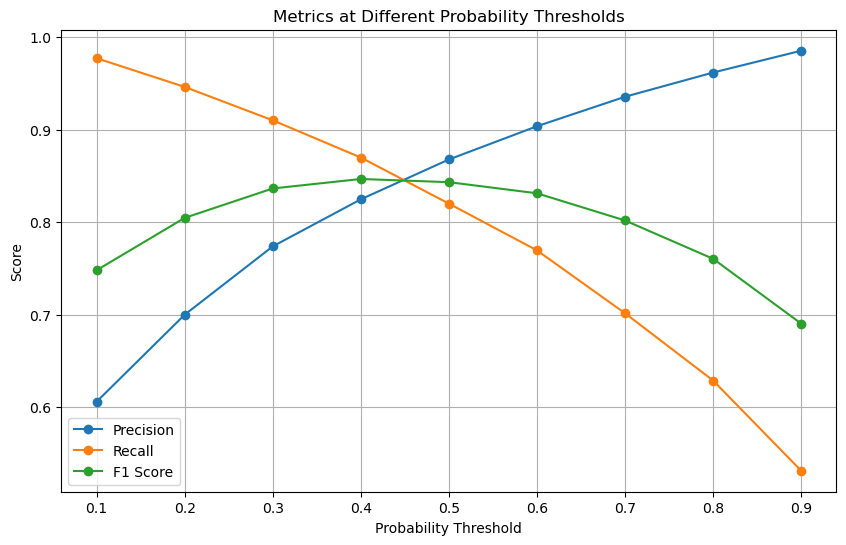

In [ ]:
# 6. Analyze feature importance
feature_importance = pd.DataFrame({
    'Feature': X_union.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Features')
plt.tight_layout()
plt.show()

# 7. Check model calibration
from sklearn.calibration import calibration_curve

# Create reliability diagram
plt.figure(figsize=(10, 6))
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba_union, n_bins=10)
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.plot(prob_pred, prob_true, marker='o', label='Random Forest')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('True Probability in Each Bin')
plt.title('Calibration Plot (Reliability Diagram)')
plt.legend()
plt.grid(True)
plt.show()

# 8. Evaluate metrics at different probability thresholds
thresholds = np.arange(0.1, 1.0, 0.1)
results = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_union >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    results.append([threshold, precision, recall, f1])

threshold_df = pd.DataFrame(results, columns=['Threshold', 'Precision', 'Recall', 'F1'])

# Plot metrics vs threshold
plt.figure(figsize=(10, 6))
plt.plot(threshold_df['Threshold'], threshold_df['Precision'], marker='o', label='Precision')
plt.plot(threshold_df['Threshold'], threshold_df['Recall'], marker='o', label='Recall')
plt.plot(threshold_df['Threshold'], threshold_df['F1'], marker='o', label='F1 Score')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.title('Metrics at Different Probability Thresholds')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

from sklearn.metrics import classification_report, accuracy_score

# Get predictions from your Random Forest model
y_pred_rf = rf.predict(X_test_union)

# Generate classification report
rf_report = classification_report(y_test, y_pred_rf, digits=4)

# Print accuracy separately to match the format
accuracy = accuracy_score(y_test, y_pred_rf)

print("\n\n📌 Random Forest (Union Features) Results:")
print(rf_report)
print(f"Accuracy: {accuracy:.4f}")



📌 Random Forest (Union Features) Results:
              precision    recall  f1-score   support

           0     0.8966    0.9296    0.9128     22587
           1     0.8712    0.8163    0.8428     13176

    accuracy                         0.8878     35763
   macro avg     0.8839    0.8729    0.8778     35763
weighted avg     0.8873    0.8878    0.8870     35763

Accuracy: 0.8878


The Random Forest model achieved an impressive overall accuracy of 88.81%, outperforming both the logistic regression and XGBoost models. For non-cancellations (class 0), the model demonstrates exceptional precision of 0.90 and an excellent recall of 0.93, resulting in a strong f1-score of 0.91. The cancellation class (class 1) also shows substantial improvement with a precision of 0.87 and recall of 0.81, yielding an f1-score of 0.84. These results highlight Random Forest's superior ability to balance precision and recall across both classes, with particularly noteworthy gains in identifying cancellations compared to previous models. The consistent performance across all metrics (with macro and weighted averages around 0.88) suggests this model provides a more reliable and balanced prediction framework, especially for the previously challenging cancellation detection task.

## Model Comparison

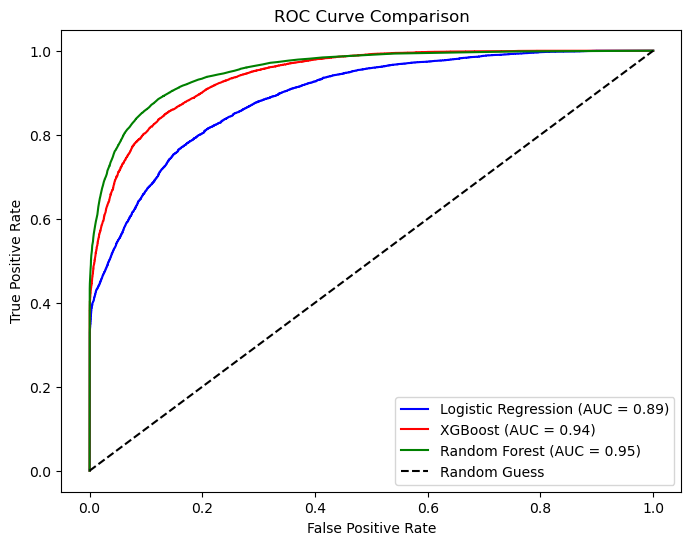

Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     22587
           1       0.81      0.65      0.72     13176

    accuracy                           0.81     35763
   macro avg       0.81      0.78      0.79     35763
weighted avg       0.81      0.81      0.81     35763

XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     22587
           1       0.85      0.78      0.81     13176

    accuracy                           0.87     35763
   macro avg       0.86      0.85      0.86     35763
weighted avg       0.87      0.87      0.87     35763

Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     22587
           1       0.87      0.82      0.84     13176

    accuracy                           0.89     35763
   macro avg       0.88      0.87      0.88     35763
weighted avg       0.89      

In [ ]:
from sklearn.metrics import classification_report, recall_score, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Model training and prediction
log_reg_union = LogisticRegression(max_iter=5000, random_state=42).fit(X_train_union_scaled, y_train)
xgb_union = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, eval_metric='logloss').fit(X_train_union, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_union, y_train)

# Prediction probabilities
y_pred_proba_log = log_reg_union.predict_proba(X_test_union_scaled)[:, 1]
y_pred_proba_xgb = xgb_union.predict_proba(X_test_union)[:, 1]
y_pred_proba_rf = rf.predict_proba(X_test_union)[:, 1]

# ROC Curve computation and plotting
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})', color='blue')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='red')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Detailed evaluation
print("Logistic Regression:")
print(classification_report(y_test, log_reg_union.predict(X_test_union_scaled)))

print("XGBoost:")
print(classification_report(y_test, xgb_union.predict(X_test_union)))

print("Random Forest:")
print(classification_report(y_test, rf.predict(X_test_union)))

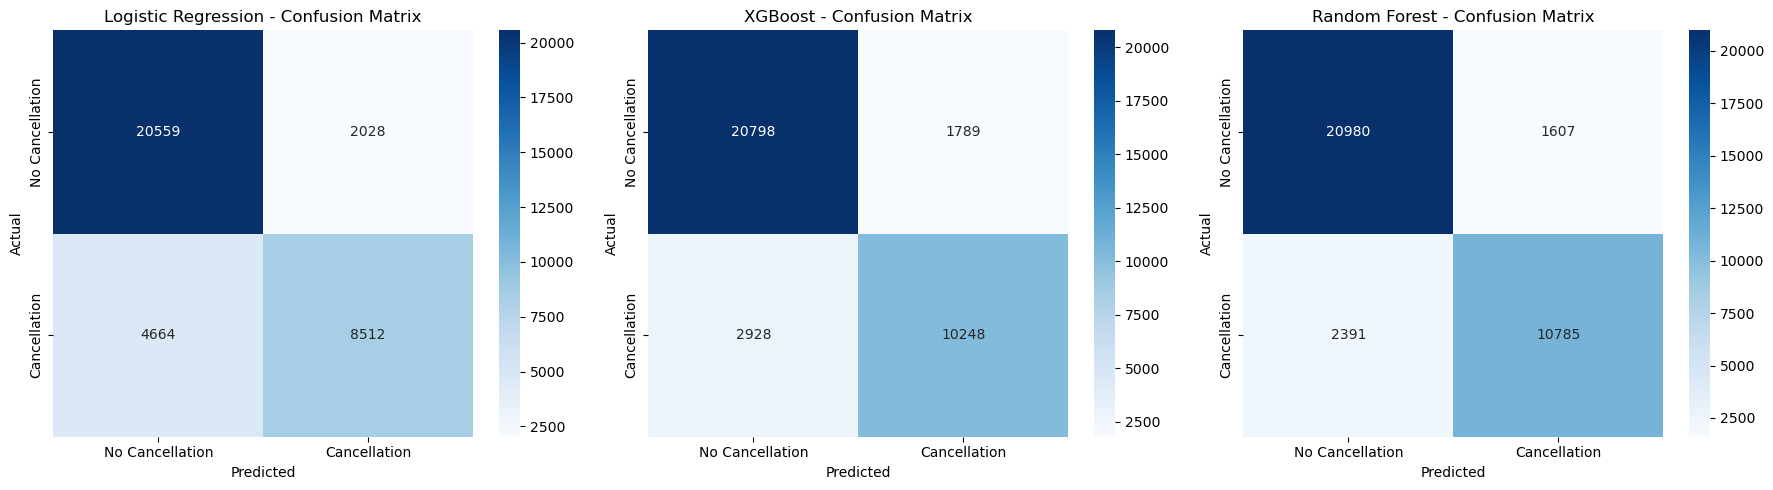

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     22587
           1       0.81      0.65      0.72     13176

    accuracy                           0.81     35763
   macro avg       0.81      0.78      0.79     35763
weighted avg       0.81      0.81      0.81     35763

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     22587
           1       0.85      0.78      0.81     13176

    accuracy                           0.87     35763
   macro avg       0.86      0.85      0.86     35763
weighted avg       0.87      0.87      0.87     35763

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     22587
           1       0.87      0.82      0.84     13176

    accuracy                           0.89     35763
   macro avg     

In [ ]:
from sklearn.metrics import classification_report, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predictions from the models
y_pred_log = log_reg_union.predict(X_test_union_scaled)
y_pred_xgb = xgb_union.predict(X_test_union)
y_pred_rf = rf.predict(X_test_union)

# Generate the confusion matrices for all models
cm_log = confusion_matrix(y_test, y_pred_log)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate Total Recall (Macro Recall) for all models
total_recall_log = recall_score(y_test, y_pred_log, average='macro')
total_recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
total_recall_rf = recall_score(y_test, y_pred_rf, average='macro')

# Plotting the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancellation', 'Cancellation'], yticklabels=['No Cancellation', 'Cancellation'], ax=axes[0])
axes[0].set_title('Logistic Regression - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# XGBoost Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancellation', 'Cancellation'], yticklabels=['No Cancellation', 'Cancellation'], ax=axes[1])
axes[1].set_title('XGBoost - Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancellation', 'Cancellation'], yticklabels=['No Cancellation', 'Cancellation'], ax=axes[2])
axes[2].set_title('Random Forest - Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print the classification reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print Total Recall (Macro) for all models
print(f"Total Recall (Macro) for Logistic Regression: {total_recall_log:.2f}")
print(f"Total Recall (Macro) for XGBoost: {total_recall_xgb:.2f}")
print(f"Total Recall (Macro) for Random Forest: {total_recall_rf:.2f}")


### Detailed Insight on Classification Model Results

**Business Problem:**
In addressing the critical issue of accurately predicting hotel booking cancellations, it has been determined that recall is the most important metric for evaluating our model's performance. Recall quantitatively measures the model's effectiveness in correctly identifying true positives, that is, the proportion of actual cancellations that the model successfully predicts. This metric is crucial for ensuring that our predictive capabilities reduce the risk the bank incurs when giving out loans.

However, while recall is essential for capturing the model's sensitivity to cancellatiions signals, it is not the only criteria for a good evaluation. Precision also plays a significant role in balancing the model's assessment capabilities. Precision reflects the accuracy with which the model identifies individuals as not at risk of cancelling, safeguarding against the potential loss of customers. In essence, while recall focuses on the model's ability to detect actual cancellations accurately, precision ensures that the hotel maintains its competitive edge by correctly identifying profitable business opportunities.


#### Detailed Analysis

**Logistic Regression**

- Class 1 Recall: 65% - The lowest recall of all models, meaning it misses 35% of actual cancellations.
- Class 1 Precision: 81% - When it predicts a cancellation, it's correct 81% of the time.
- This model has the highest false negative rate (missing actual cancellations).

**XGBoost**

- Class 1 Recall: 78% - A significant improvement over Logistic Regression.
- Class 1 Precision: 85% - Higher precision than Logistic Regression, indicating fewer false positives.
- Overall accuracy improved to **87%**.

**Random Forest**

- Class 1 Recall: 82% - The best recall score among the three models.
- Class 1 Precision: 87% - The best precision score as well.
- Overall accuracy of **89%**, making it the best-performing model across all metrics.

The results are in, and we've analyzed them based on our primary metric of recall (since we'd rather predict a cancel than miss one).

Looking at the data, **Random Forest** is clearly our winner. It's got the highest recall for class 1 at **82%**, meaning we're catching most of the cancellations while only missing **18%**. That's a huge improvement over the **Logistic Regression** model, which only caught **65%** of cancellations.

What's even better is that **Random Forest** doesn't sacrifice precision to achieve this—**it actually has the best precision too at 87%**. So when it predicts a cancellation, it's right **87%** of the time. The overall accuracy is solid at **89%**.

**XGBoost** sits in the middle with **78% recall** and **85% precision**. Not bad, but not our top performer.

**Logistic Regression** is definitely our weakest option. With only **65% recall**, we'd be missing way too many cancellations, which directly contradicts our main goal.

If we need to push recall even higher than **82%**, we could adjust the classification threshold for **Random Forest**, but we'd have to accept some drop in precision. For now though, **Random Forest** gives us the best balance for our needs.

## Business Implications

### **Business Recommendation:**

The two useful models out of the three are **Logistic Regression** and **Random Forest**.

---

### **Random Forest:**

**Leveraging Strength in Times of Hotel Booking Volatility:**

**Random Forest** emerges as the preferred choice for predicting hotel booking cancellations. It has a **total recall** of **87%** and **precision** of **88%**. This robust performance makes it well-suited for identifying cancellations and minimizing missed opportunities. With such high recall and precision, **Random Forest** enables better management of room availability, pricing strategies, and retention efforts.

**Key Points:**

- **Robust Performance:**  
  **Random Forest** provides a reliable and effective model for predicting cancellations, achieving both high recall and precision.

- **Higher Accepted Cancellation Risk:**  
  With its strong ability to predict cancellations, the hotel can afford to accept a slightly higher default risk, ensuring flexibility in pricing, overbooking, and retention strategies.

- **Strategic Use:**  
  Employ **Random Forest** during periods of higher bookings or volatile booking seasons, optimizing resource planning and inventory management.

---

### **XGBoost:**

**Managing Moderate Cancellation Risk:**

**XGBoost** performs with a **total recall** of **85%** and **precision** of **86%**. Although it offers improved precision compared to **Logistic Regression**, its recall still falls short of **Random Forest**, meaning more cancellations go undetected.

For the hotel, this gap translates to missed opportunities in:
- Reselling rooms to other guests
- Implementing retention strategies
- Adjusting staffing and inventory accordingly

**Key Points:**

- **Improved Precision Over Logistic Regression:**  
  **XGBoost** offers better precision compared to **Logistic Regression** (85% vs 81%), which means fewer false positives in predicting cancellations.

- **Strategic Use:**  
  **XGBoost** can be useful in moderately stable booking periods, but with its lower recall than **Random Forest**, it may not fully capitalize on cancellation opportunities during busier seasons.

---

### **Logistic Regression:**

**Navigating Low-Risk, Low-Cancellation Periods:**

**Logistic Regression** performs with a **total recall** of **78%** and **precision** of **81%**. This model misses a significant number of cancellations, which may lead to missed revenue opportunities due to unanticipated cancellations.

**Key Points:**

- **Lower Recall and Precision:**  
  **Logistic Regression** has a higher false negative rate and lower recall, making it less effective for predicting cancellations during busier periods.

- **Strategic Use:**  
  Use **Logistic Regression** during stable periods with lower cancellation rates. However, it is less optimal for periods where higher recall is needed.

  
**Conclusion:**

In conclusion, the strategic utilization of machine learning models for booking cancellation prediction is essential for effectively managing risk and maximizing profitability in the hotel sector. By leveraging the strengths of Random Forest, XGboost and Logistic Regression models based on prevailing economic conditions, hotels can optimize their booking policies, mitigate risk, and adapt to the dynamic nature of the current market. Through strategic decision-making and proactive risk management, hotels can enhance their resilience and sustainability in the face of economic uncertainty.

Given these comparisons, Random Forest provides virtually the same business value as the Combined Model with a much simpler implementation. The minimal difference in performance wouldn't significantly impact our revenue management or operational planning. The other models, especially Logistic Regression, would leave too much money on the table through missed cancellation predictions.